# Estudio de caso sobre sesgo en modelos de IA


## Análisis y mitigación de sesgo en modelos de IA para la aprobación de tarjetas de crédito

### 1. Lectura del archivo CSV y visualización inicial del dataset



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Cargar y explorar el dataset
data = pd.read_csv('SegmentoCliente_Tarjeta.csv')
print("Primeras filas del dataset:")
data.columns


Primeras filas del dataset:


Index(['ID del cliente', 'Edad', 'Género', 'Etnicidad', 'Ingresos anuales',
       'Crédito actual', 'Historial de crédito', 'Deuda total',
       'Límite de crédito', 'Tasa de interés', 'Número de pagos atrasados',
       'Aprobación de tarjeta de crédito'],
      dtype='object')

### 2. Visualización del sesgo en la aprobación de tarjetas de crédito por etnicidad   (GRAFICO 1)

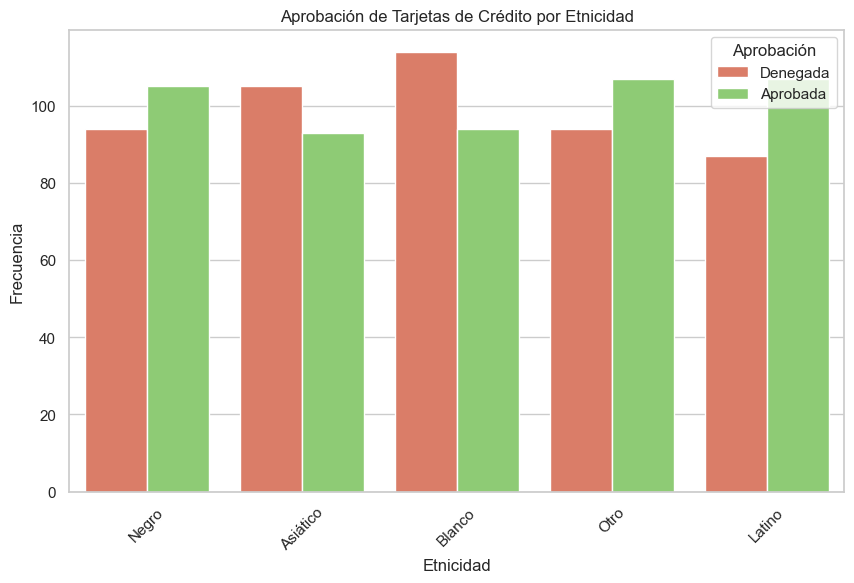

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Etnicidad', hue='Aprobación de tarjeta de crédito', data=data, palette=['#ED7155', '#88DA66'])
plt.title('Aprobación de Tarjetas de Crédito por Etnicidad')
plt.xlabel('Etnicidad')
plt.ylabel('Frecuencia')
plt.legend(title='Aprobación', labels=['Denegada', 'Aprobada'])
plt.xticks(rotation=45)
plt.show()

### 3. Visualización del sesgo en la aprobación de tarjetas de crédito por género



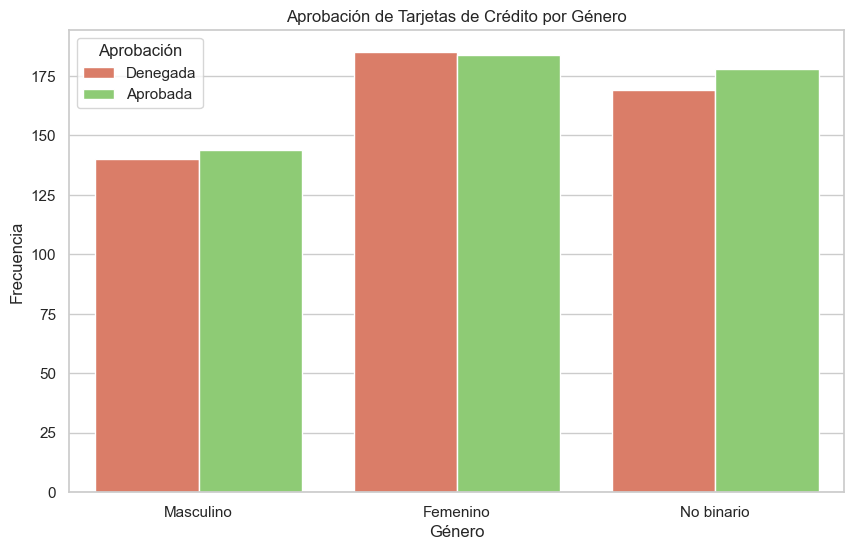

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Género', hue='Aprobación de tarjeta de crédito',data=data, palette=['#ED7155', '#88DA66'])
plt.title('Aprobación de Tarjetas de Crédito por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.legend(title='Aprobación', labels=['Denegada', 'Aprobada'])
plt.show()

### 4. Comparación del historial de crédito por etnicidad


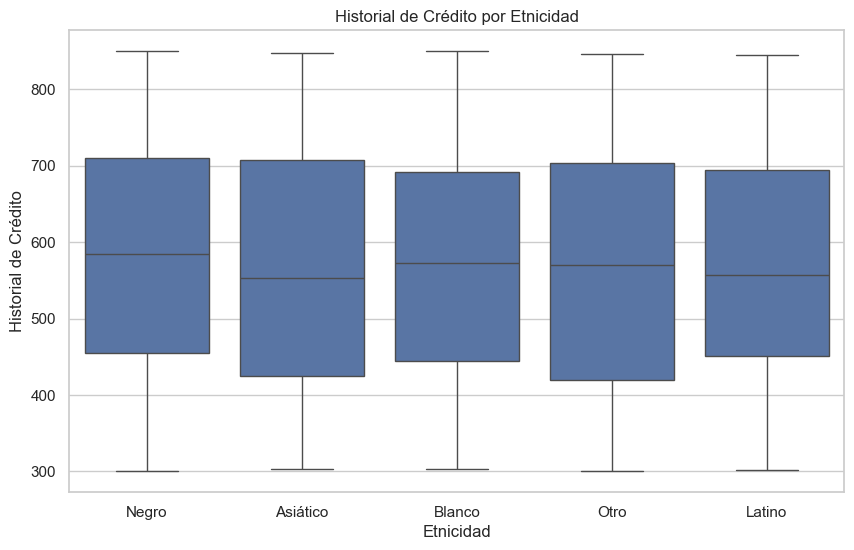

In [26]:
# Comparación del historial de crédito por etnicidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Etnicidad', y='Historial de crédito', data=data)
plt.title('Historial de Crédito por Etnicidad')
plt.xlabel('Etnicidad')
plt.ylabel('Historial de Crédito')
plt.show()


### 5. Comparación de ingresos anuales por etnicidad y género


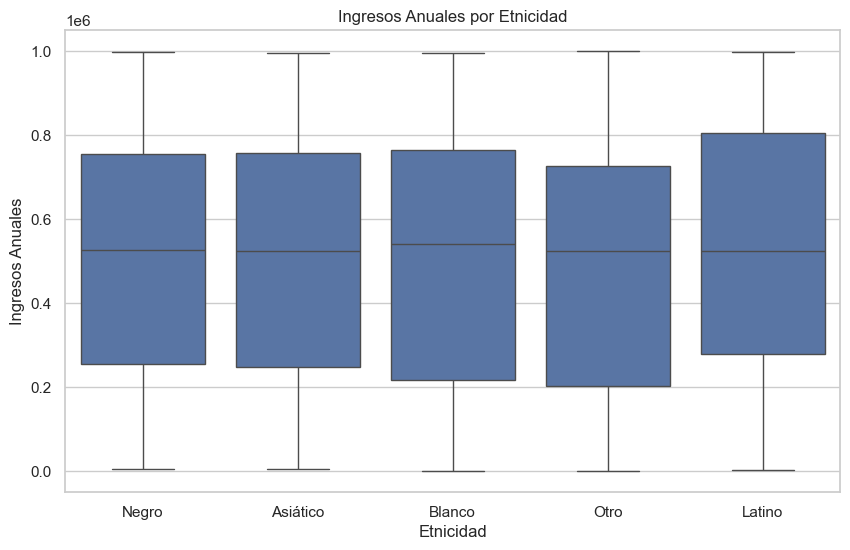

In [27]:
# Etnicidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Etnicidad', y='Ingresos anuales', data=data)
plt.title('Ingresos Anuales por Etnicidad')
plt.xlabel('Etnicidad')
plt.ylabel('Ingresos Anuales')
plt.show()


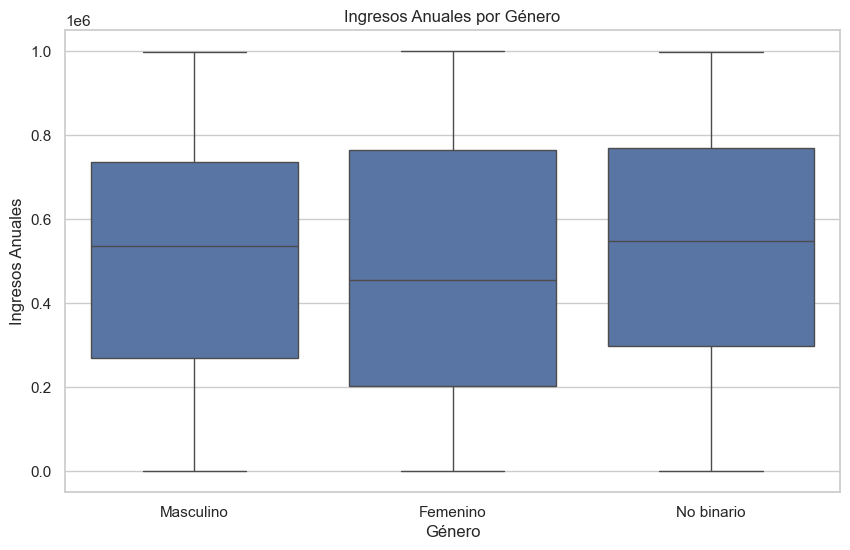

In [28]:
#  género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Género', y='Ingresos anuales', data=data)
plt.title('Ingresos Anuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Anuales')
plt.show()


### 6. Mitigar sesgo


In [29]:
# Propuestas para mitigar el sesgo
def mitigar_sesgo(data):
    # Normalización del historial de crédito para todas las etnias
    data['Historial_Credito_Normalizado'] = data.groupby('Etnicidad')['Historial de crédito'].transform(
        lambda x: (x - x.mean()) / x.std()
    )
    
    # Reentrenamiento del modelo de aprobación considerando el historial de crédito normalizado
    data['Nueva_Aprobación_TC'] = np.where(
        (data['Historial_Credito_Normalizado'] > -1) & (data['Ingresos anuales'] > 30000), 1, 0
    )
    
    return data

# Aplicación de la mitigación del sesgo
data_mitigada = mitigar_sesgo(data)


### 7. Visualización de las nuevas aprobaciones después de mitigar el sesgo

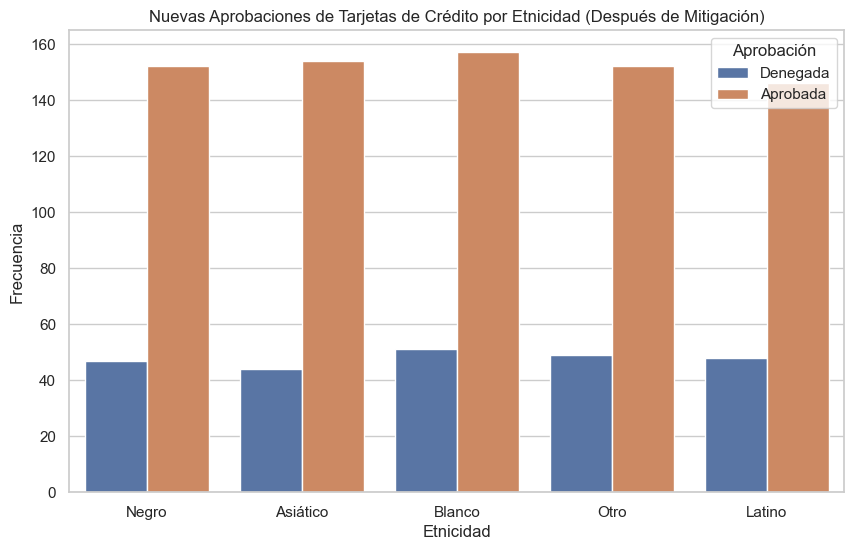

In [30]:
# Visualización de las nuevas aprobaciones después de mitigar el sesgo
plt.figure(figsize=(10, 6))
sns.countplot(x='Etnicidad', hue='Nueva_Aprobación_TC', data=data_mitigada)
plt.title('Nuevas Aprobaciones de Tarjetas de Crédito por Etnicidad (Después de Mitigación)')
plt.xlabel('Etnicidad')
plt.ylabel('Frecuencia')
plt.legend(title='Aprobación', labels=['Denegada', 'Aprobada'])
plt.show()


# RESUMEN GENERAL:

## El primer gráfico muestra las aprobaciones de tarjetas de crédito antes de la mitigación del sesgo, mientras que el segundo gráfico presenta los resultados posteriores con una distribución más equitativa entre las distintas etnicidades.


C:\Users\User\AppData\Local\Temp\ipykernel_1348\1908369517.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\User\AppData\Local\Temp\ipykernel_1348\1908369517.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


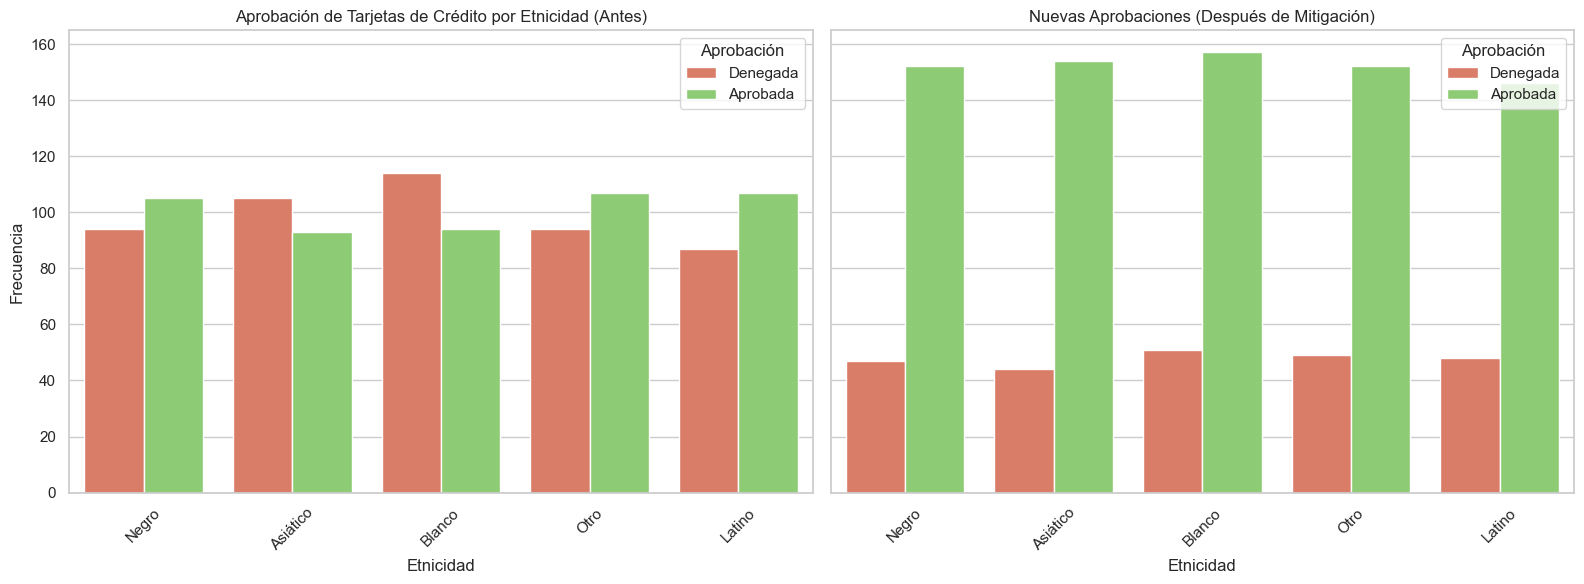

In [32]:
# Configuración del estilo
sns.set(style="whitegrid")
A
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer gráfico: Aprobación de tarjetas de crédito antes de la mitigación del sesgo
sns.countplot(x='Etnicidad', hue='Aprobación de tarjeta de crédito', data=data, palette=['#ED7155', '#88DA66'], ax=axes[0])
axes[0].set_title('Aprobación de Tarjetas de Crédito por Etnicidad (Antes)')
axes[0].set_xlabel('Etnicidad')
axes[0].set_ylabel('Frecuencia')
axes[0].legend(title='Aprobación', labels=['Denegada', 'Aprobada'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Segundo gráfico: Aprobación de tarjetas de crédito después de mitigar el sesgo
sns.countplot(x='Etnicidad', hue='Nueva_Aprobación_TC', data=data_mitigada, palette=['#ED7155', '#88DA66'], ax=axes[1])
axes[1].set_title('Nuevas Aprobaciones (Después de Mitigación)')
axes[1].set_xlabel('Etnicidad')
axes[1].set_ylabel('Frecuencia')
axes[1].legend(title='Aprobación', labels=['Denegada', 'Aprobada'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Ajustar el espaciado entre gráficos
plt.tight_layout()

# Mostrar el gráfico comparativo
plt.show()

# CONCLUSIONES 
# Se aprecian diferencias importantes entre las diversas etnias en los gráficos de aprobaciones de tarjetas de crédito antes y después de reducir el sesgo, indicando un posible sesgo en el modelo original. Después de implementar la mitigación del sesgo, la proporción de aprobaciones y rechazos es más justa, lo que señala que la igualdad del modelo ha sido mejorada gracias a la normalización del historial crediticio. Es importante observar si la cantidad total de aprobaciones ha experimentado un cambio significativo, ya que un incremento podría señalar una evaluación más equitativa. Garamtizara que ninguna etnia se vea afectada de manera desproporcionada es crucial mediante una distribución equitativa por etnicidad después de la mitigación. Es muy importante confirmar la claridad de los cambios en las aprobaciones sin añadir sesgos adicionales